# In this file we will evaluate the DVHs for the first three patients

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
fraction_dictionary = {
    '1a': 0,
    '1aA': 1,
    '1aB': 2,
    '1aC': 3,
    '1aD': 4,
    '1aE': 5,
}

In [2]:
overlaps_3 = np.array([9.08,19.79,6.02,9.45,19.59,12.62])
overlaps_14 = np.array([2.88,3.35,3.35,0.53,1.92,3.66])
overlaps_18 = np.array([0.92, 0.83, 1.08, 1.91, 0.00, 0.58])
overlaps_25 = np.array([0.41,0.44,0.75,0.00,0.00,0.38])
overlaps_26 = np.array([2.11,2.14,0.87,3.57,2.59,1.91])
overlaps_49 = np.array([4.27,5.91,3.28,3.87,4.18,8.36])
overlaps = [overlaps_3, overlaps_14, overlaps_18, overlaps_25, overlaps_26, overlaps_49]

AF_doses_3 = [6,6,9,6,6,6]
AF_doses_14 = [7,6,6,10,7,6]
AF_doses_18 = [7,7,6,6,10,6]
AF_doses_25 = [6,6,6,10,7,6]
AF_doses_26 = [6,6,10,6,6,7]
AF_doses_49 = [6,6,10,10,8,6]
all_AF_doses = np.array([AF_doses_3, AF_doses_14, AF_doses_18, AF_doses_25, AF_doses_26, AF_doses_49])

prescribed_dose_3 = 33
prescribed_dose_14 = 35
prescribed_dose_18 = 35
prescribed_dose_25 = 35
prescribed_dose_26 = 35
prescribed_dose_49 = 40
prescribed_doses = [prescribed_dose_3, prescribed_dose_14, prescribed_dose_18, prescribed_dose_25, prescribed_dose_26, prescribed_dose_49]


## use steepness

In [3]:
import adaptive_fractionation_overlap as af
# intercept = -0.6605040
intercept = 0
slope = -0.65
for overlap in np.array([9.08,19.79,6.02,9.45,19.59,12.62]):
    steepness = np.abs(intercept + slope * overlap)
    print('steepness for', overlap, '=', steepness)
doses, accum, penalty  = af.adaptfx_full(volumes = overlaps_3, number_of_fractions= 5, min_dose = 6, max_dose = 10, mean_dose = 6.6, dose_steps=0.5)
print(penalty)

steepness for 9.08 = 5.902
steepness for 19.79 = 12.8635
steepness for 6.02 = 3.913
steepness for 9.45 = 6.1425
steepness for 19.59 = 12.733500000000001
steepness for 12.62 = 8.203
0 6.0
penalty 0.0
1 8.0
penalty 19.866
2 6.5
penalty 5.492812499999999
3 6.0
penalty 0.0
4 6.5
penalty 7.335374999999999
-32.6941875
0 6.0
penalty 0.0
1 8.0
penalty 19.866
2 6.5
penalty 5.492812499999999
3 6.0
penalty 0.0
4 6.5
penalty 7.335374999999999
-32.6941875


In [4]:
def calculate_uniform_penalties(dose, overlaps, min_dose = 6):
    penalties = []
    for overlap in overlaps:
        penalty = af.penalty_calc_single(dose, min_dose, overlap, intercept = intercept, slope = slope)
        penalties.append(penalty)
    print(np.sum(penalties))
    return np.array(penalties)


In [5]:
calculate_uniform_penalties(dose=6.6, overlaps = np.array([19.79,6.02,9.45,19.59,12.62]))

48.37598999999996


array([14.18943,  4.31634,  6.77565, 14.04603,  9.04854])

newww


In [6]:

def penalty_calc_full(overlaps, dose, min_dose):
    penalties = []
    for overlap in overlaps:
        penalty = -af.penalty_calc_single(dose, min_dose, overlap, intercept = intercept, slope = slope)
        penalties.append(penalty)
    return np.array(penalties)


def penalty_calc_full_list(overlaps, doses, min_dose):
    penalties = []
    for index in range(len(overlaps)):
        print('overlap', overlaps[index])
        print('dose', doses[index])
        penalty = -af.penalty_calc_single(doses[index], min_dose, overlaps[index], intercept = intercept, slope = slope)
        penalties.append(penalty)
    return np.array(penalties)

In [7]:
benefits = []
doses_all = []
total_penalties = []
standard_penalties_all = []
for index in range(len(overlaps)):
    doses, accum, total_penalty = af.adaptfx_full(volumes = overlaps[index], number_of_fractions= 5, min_dose = 6, max_dose = 10, mean_dose = prescribed_doses[index]/5, dose_steps = 0.5)
    standard_penalties = penalty_calc_full(overlaps[index][1:], prescribed_doses[index]/5, 6)
    benefits.append(total_penalty - standard_penalties.sum())
    doses_all.append(doses)
    total_penalties.append(total_penalty)
    standard_penalties_all.append(standard_penalties)


0 6.0
penalty 0.0
1 8.0
penalty 19.866
2 6.5
penalty 5.492812499999999
3 6.0
penalty 0.0
4 6.5
penalty 7.335374999999999
0 7.0
penalty 4.438750000000001
1 7.0
penalty 4.438750000000001
2 9.0
penalty 3.14025
3 6.0
penalty 0.0
4 6.0
penalty 0.0
0 7.0
penalty 4.438750000000001
1 7.0
penalty 4.438750000000001
2 9.0
penalty 3.14025
3 6.0
penalty 0.0
4 6.0
penalty 0.0
0 7.0
penalty 1.09975
1 6.5
penalty 0.62775
2 6.5
penalty 1.1101874999999999
3 9.0
penalty 0.0
4 6.0
penalty 0.0
0 7.0
penalty 1.09975
1 6.5
penalty 0.62775
2 6.5
penalty 1.1101874999999999
3 9.0
penalty 0.0
4 6.0
penalty 0.0
0 7.0
penalty 0.583
1 6.5
penalty 0.4359375
2 9.5
penalty 0.0
3 6.0
penalty 0.0
4 6.0
penalty 0.0
0 7.0
penalty 0.583
1 6.5
penalty 0.4359375
2 9.5
penalty 0.0
3 6.0
penalty 0.0
4 6.0
penalty 0.0
0 7.0
penalty 2.8355
1 8.5
penalty 3.9421874999999997
2 6.0
penalty 0.0
3 6.5
penalty 1.5054375
4 7.0
penalty 2.53075
0 7.0
penalty 2.8355
1 8.5
penalty 3.9421874999999997
2 6.0
penalty 0.0
3 6.5
penalty 1.5054375

In [8]:
np.array(benefits).round(1)

array([15.7,  5. ,  3. ,  1.1,  3.9,  6.6])

In [9]:
doses_all

[array([6. , 8. , 6.5, 6. , 6.5]),
 array([7., 7., 9., 6., 6.]),
 array([7. , 6.5, 6.5, 9. , 6. ]),
 array([7. , 6.5, 9.5, 6. , 6. ]),
 array([7. , 8.5, 6. , 6.5, 7. ]),
 array([7.5, 9. , 8. , 8. , 7.5])]

In [10]:
standard_penalties_all

[array([-14.18943,  -4.31634,  -6.77565, -14.04603,  -9.04854]),
 array([-4.43875, -4.43875, -0.70225, -2.544  , -4.8495 ]),
 array([-1.09975, -1.431  , -2.53075, -0.     , -0.7685 ]),
 array([-0.583  , -0.99375, -0.     , -0.     , -0.5035 ]),
 array([-2.8355 , -1.15275, -4.73025, -3.43175, -2.53075]),
 array([-19.503, -10.824, -12.771, -13.794, -27.588])]

In [11]:
benefits_old_AF = []
total_penalties_old_AF = []
standard_penalties_all_old_AF = []
doses_all_old_AF = []
for index in range(len(overlaps)):
    total_penalty = penalty_calc_full_list(overlaps[index][1:], all_AF_doses[index][1:], 6)
    standard_penalties = penalty_calc_full(overlaps[index][1:], prescribed_doses[index]/5, 6)
    benefits_old_AF.append(total_penalty.sum() - standard_penalties.sum())
    total_penalties_old_AF.append(total_penalty)
    standard_penalties_all_old_AF.append(standard_penalties)
    doses_all_old_AF.append(all_AF_doses[index])


overlap 19.79
dose 6
overlap 6.02
dose 9
overlap 9.45
dose 6
overlap 19.59
dose 6
overlap 12.62
dose 6
overlap 3.35
dose 6
overlap 3.35
dose 6
overlap 0.53
dose 10
overlap 1.92
dose 7
overlap 3.66
dose 6
overlap 0.83
dose 7
overlap 1.08
dose 6
overlap 1.91
dose 6
overlap 0.0
dose 10
overlap 0.58
dose 6
overlap 0.44
dose 6
overlap 0.75
dose 6
overlap 0.0
dose 10
overlap 0.0
dose 7
overlap 0.38
dose 6
overlap 2.14
dose 6
overlap 0.87
dose 10
overlap 3.57
dose 6
overlap 2.59
dose 6
overlap 1.91
dose 7
overlap 5.91
dose 6
overlap 3.28
dose 10
overlap 3.87
dose 10
overlap 4.18
dose 8
overlap 8.36
dose 6


In [12]:
total_penalties_old_AF

[array([ -0.    , -35.6685,  -0.    ,  -0.    ,  -0.    ]),
 array([-0.   , -0.   , -4.876, -2.544, -0.   ]),
 array([-1.09975, -0.     , -0.     , -0.     , -0.     ]),
 array([-0., -0., -0., -0., -0.]),
 array([-0.     , -8.004  , -0.     , -0.     , -2.53075]),
 array([ -0.   , -30.176, -35.604, -13.794,  -0.   ])]

In [13]:
benefits_old_AF

[12.707489999999964,
 9.55325,
 4.73025,
 2.0802500000000004,
 4.14625,
 4.905999999999992]

## analysis calculated vs observed standard

In [14]:
import os
import glob

# Define the path to the DVH eval folder
dvh_folder = r"../DVH_EVAL"

# Get all Excel files in the folder
excel_files = glob.glob(os.path.join(dvh_folder, "*.xlsx"))

# Dictionary to store all loaded DataFrames
excel_data = {}

# Load each Excel file separately
for file_path in excel_files:
    # Extract the patient number from the filename
    filename = os.path.basename(file_path)
    # Assumes filename format: 'Auswertung_Patient_<number>.xlsx'
    patient_number = filename.split('_')[-1].replace('.xlsx', '')
    
    try:
        # Load the Excel file
        df = pd.read_excel(file_path, index_col = 0)
        excel_data[patient_number] = df
        print(f"Loaded {patient_number}: {df.shape[0]} rows, {df.shape[1]} columns")
    except Exception as e:
        print(f"Error loading {patient_number}: {e}")

print(f"\nTotal files loaded: {len(excel_data)}")
print(f"Available datasets: {list(excel_data.keys())}")

Loaded 14: 6 rows, 10 columns
Loaded 18: 6 rows, 10 columns
Loaded 25: 6 rows, 10 columns
Loaded 26: 6 rows, 10 columns
Loaded 3: 6 rows, 10 columns
Loaded 49: 6 rows, 10 columns

Total files loaded: 6
Available datasets: ['14', '18', '25', '26', '3', '49']


Patient 3: 5 fractions loaded
Patient 14: 5 fractions loaded
Patient 18: 5 fractions loaded
Patient 25: 5 fractions loaded
Patient 26: 5 fractions loaded
Patient 49: 5 fractions loaded
Patient 3: Calculated mean = -9.675, Observed mean = -13.543
Patient 14: Calculated mean = -3.395, Observed mean = -3.772
Patient 18: Calculated mean = -1.166, Observed mean = -1.248
Patient 25: Calculated mean = -0.416, Observed mean = -0.286
Patient 26: Calculated mean = -2.936, Observed mean = -2.720
Patient 49: Calculated mean = -16.896, Observed mean = -15.972


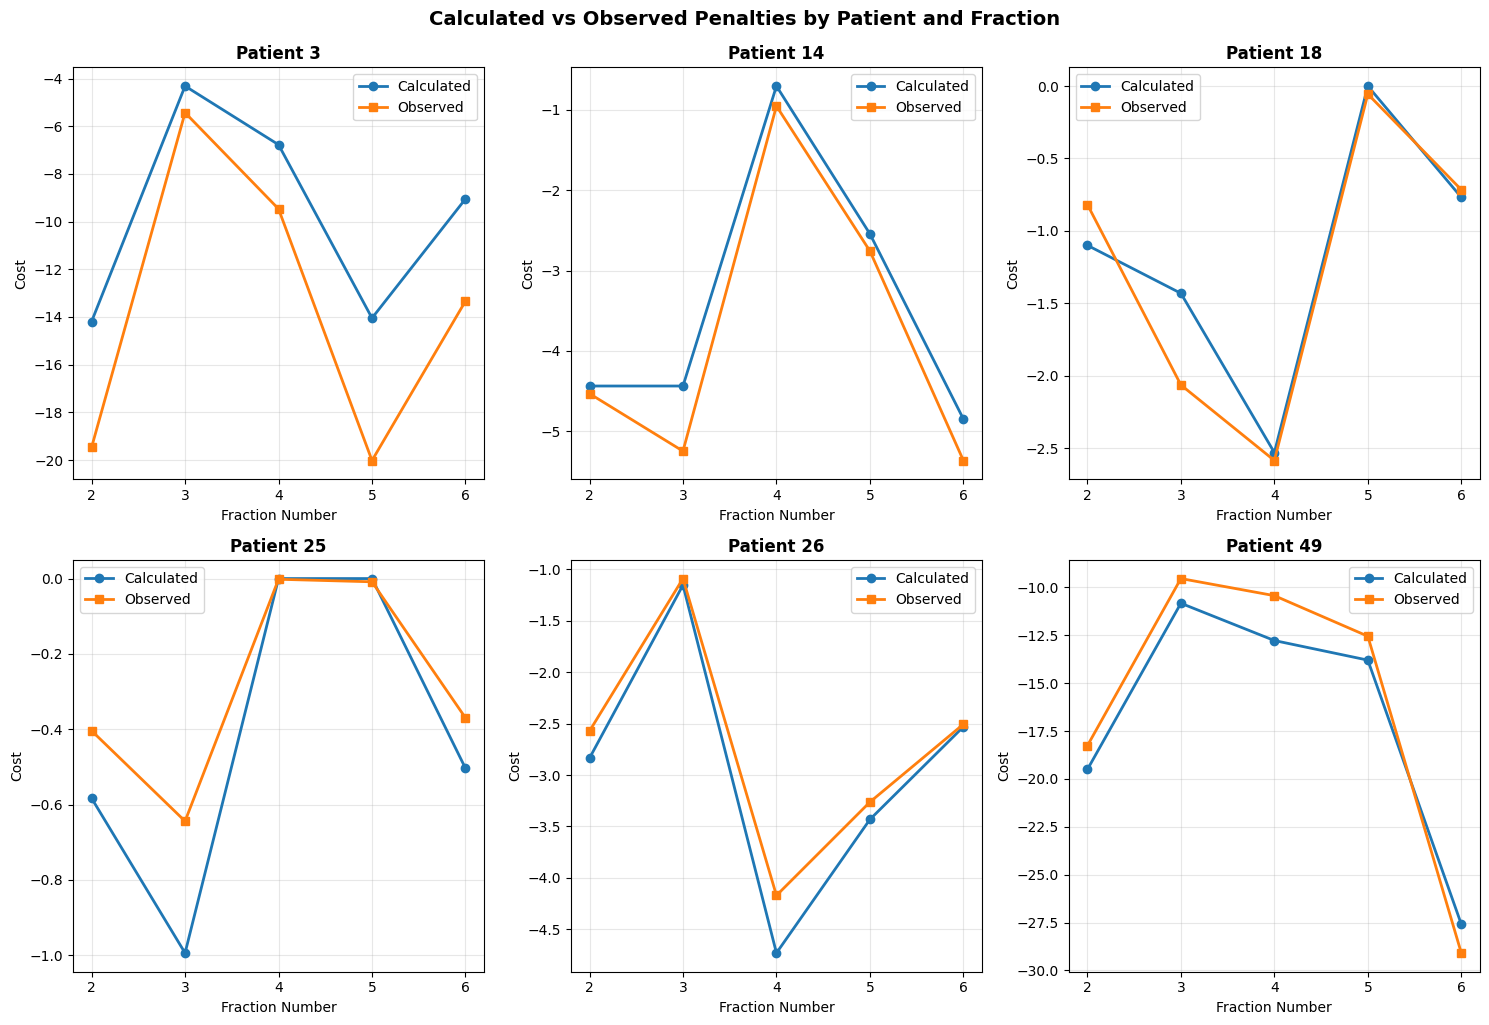

In [15]:
# Extract observed penalties from Excel data for each patient
patient_numbers = ['3', '14', '18', '25', '26', '49']  # Adjust these based on your Excel file keys
observed_penalties_all = []

for patient_num in patient_numbers:
    if patient_num in excel_data:
        # Get PTV_or column, omitting the first value (planning scan)
        ptv_or_values = -excel_data[patient_num]['PTV_or'].values[1:]  # Skip first column
        observed_penalties_all.append(ptv_or_values)
        print(f"Patient {patient_num}: {len(ptv_or_values)} fractions loaded")
    else:
        print(f"Warning: Patient {patient_num} not found in excel_data")
        observed_penalties_all.append([])

# Create subplots for each patient
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, patient_num in enumerate(patient_numbers):
    ax = axes[i]
    
    # Get data for this patient
    calculated = standard_penalties_all[i]
    observed = observed_penalties_all[i]
    
    if len(observed) > 0 and len(calculated) > 0:
        # Ensure both arrays have the same length
        min_length = min(len(calculated), len(observed))
        calculated = calculated[:min_length]
        observed = observed[:min_length]
        
        # Create fraction numbers (starting from 2 since we skip planning scan)
        fractions = list(range(2, min_length + 2))
        
        # Plot both calculated and observed penalties
        ax.plot(fractions, calculated, 'o-', label='Calculated', linewidth=2, markersize=6)
        ax.plot(fractions, observed, 's-', label='Observed', linewidth=2, markersize=6)
        
        # Customize the plot
        ax.set_title(f'Patient {patient_num}', fontsize=12, fontweight='bold')
        ax.set_xlabel('Fraction Number')
        ax.set_ylabel('Cost')
        ax.legend()
        ax.grid(True, alpha=0.3)
        ax.set_xticks(fractions)
        
        # Print comparison stats
        print(f"Patient {patient_num}: Calculated mean = {np.mean(calculated):.3f}, Observed mean = {np.mean(observed):.3f}")
    else:
        ax.text(0.5, 0.5, f'No data\nfor Patient {patient_num}', 
                ha='center', va='center', transform=ax.transAxes, fontsize=12)
        ax.set_title(f'Patient {patient_num}', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.suptitle('Calculated vs Observed Penalties by Patient and Fraction', fontsize=14, fontweight='bold', y=1.02)
plt.show()

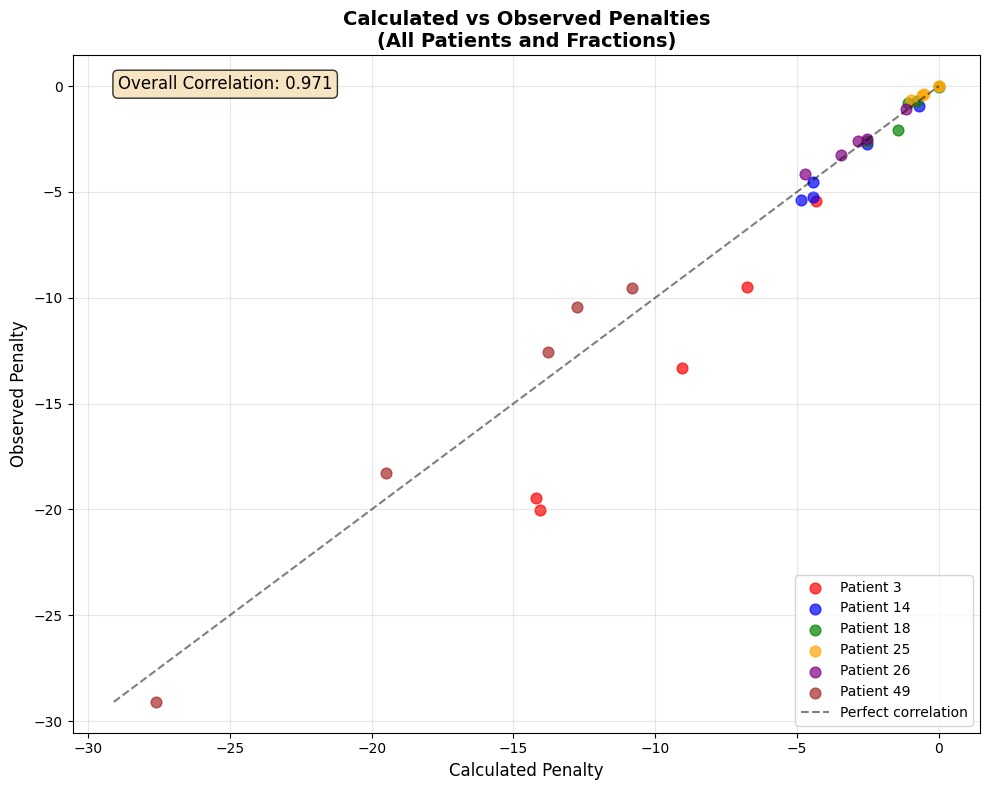


=== Summary Statistics ===
Total data points: 30
Calculated penalties - Mean: -5.747, Std: 6.577
Observed penalties - Mean: -6.257, Std: 7.256
Correlation coefficient: 0.971


In [16]:
# Create a correlation plot: Calculated vs Observed penalties
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown']
all_calculated = []
all_observed = []

for i, patient_num in enumerate(patient_numbers):
    calculated = standard_penalties_all[i]
    observed = observed_penalties_all[i]
    
    if len(observed) > 0 and len(calculated) > 0:
        # Ensure both arrays have the same length
        min_length = min(len(calculated), len(observed))
        calculated = calculated[:min_length]
        observed = observed[:min_length]
        
        # Add to overall arrays for correlation
        all_calculated.extend(calculated)
        all_observed.extend(observed)
        
        # Plot for this patient
        ax.scatter(calculated, observed, label=f'Patient {patient_num}', 
                  color=colors[i], s=60, alpha=0.7)

# Add perfect correlation line
if len(all_calculated) > 0 and len(all_observed) > 0:
    min_val = min(min(all_calculated), min(all_observed))
    max_val = max(max(all_calculated), max(all_observed))
    ax.plot([min_val, max_val], [min_val, max_val], 'k--', alpha=0.5, label='Perfect correlation')
    
    # Calculate and display correlation coefficient
    correlation = np.corrcoef(all_calculated, all_observed)[0, 1]
    ax.text(0.05, 0.95, f'Overall Correlation: {correlation:.3f}', 
            transform=ax.transAxes, fontsize=12, 
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

ax.set_xlabel('Calculated Penalty', fontsize=12)
ax.set_ylabel('Observed Penalty', fontsize=12)
ax.set_title('Calculated vs Observed Penalties\n(All Patients and Fractions)', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\n=== Summary Statistics ===")
print(f"Total data points: {len(all_calculated)}")
if len(all_calculated) > 0:
    print(f"Calculated penalties - Mean: {np.mean(all_calculated):.3f}, Std: {np.std(all_calculated):.3f}")
    print(f"Observed penalties - Mean: {np.mean(all_observed):.3f}, Std: {np.std(all_observed):.3f}")
    print(f"Correlation coefficient: {correlation:.3f}")

## old AF analysis

Patient 3: 5 fractions loaded
Patient 14: 5 fractions loaded
Patient 18: 5 fractions loaded
Patient 25: 5 fractions loaded
Patient 26: 5 fractions loaded
Patient 49: 5 fractions loaded


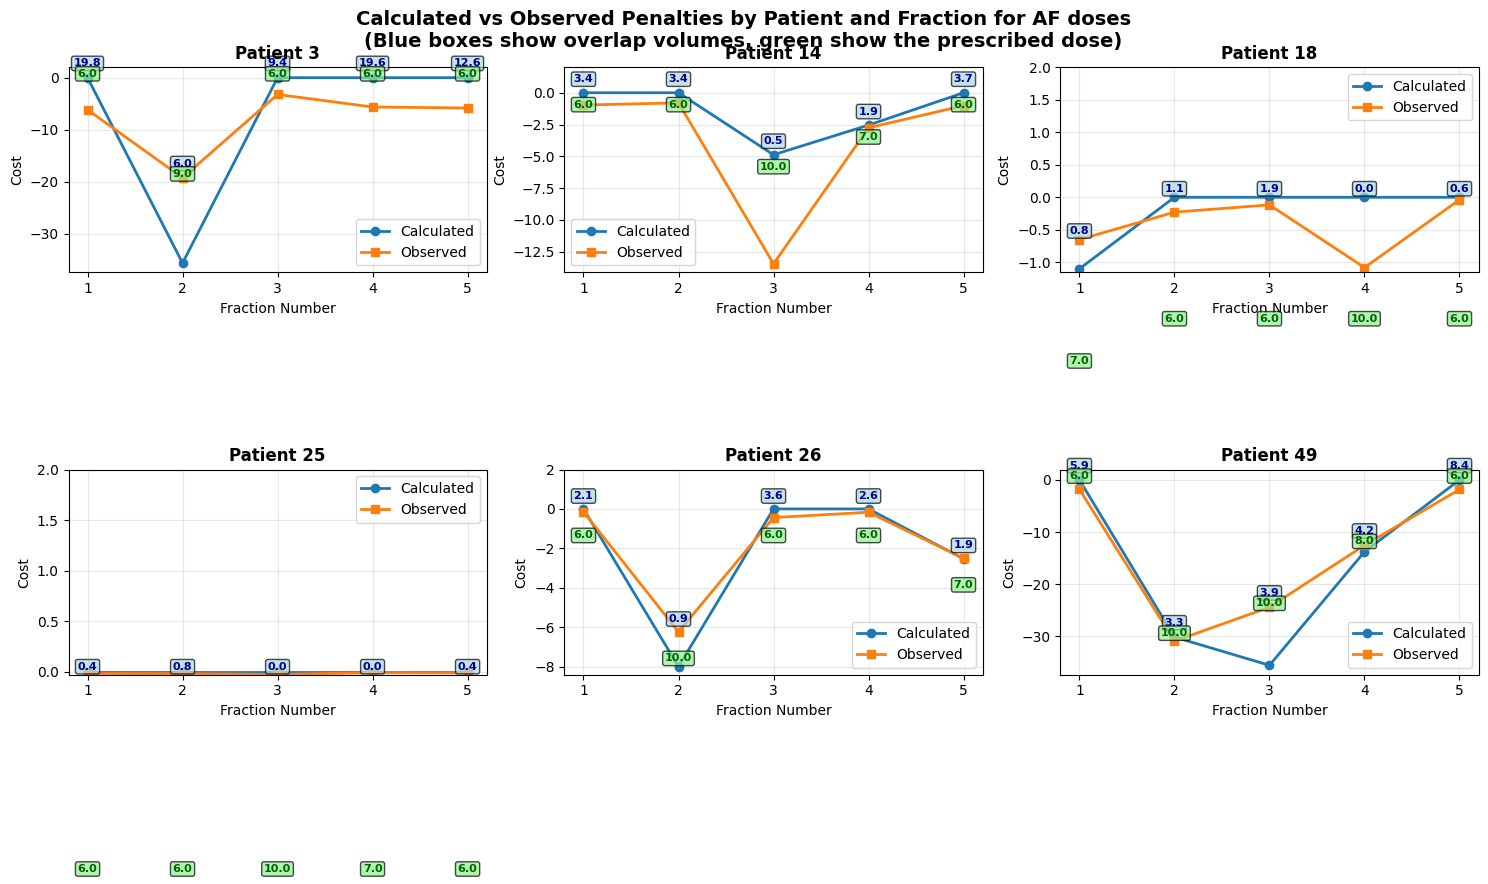

In [17]:
# Extract observed penalties from Excel data for each patient
patient_numbers = ['3', '14', '18', '25', '26', '49']  # Adjust these based on your Excel file keys
observed_AF_penalties_all = []

for patient_num in patient_numbers:
    if patient_num in excel_data:
        # Get PTV_AF column, omitting the first value (planning scan)
        ptv_af_values = -excel_data[patient_num]['PTV_AF'].values[1:]  # Skip first column
        observed_AF_penalties_all.append(ptv_af_values)
        print(f"Patient {patient_num}: {len(ptv_af_values)} fractions loaded")
    else:
        print(f"Warning: Patient {patient_num} not found in excel_data")
        observed_AF_penalties_all.append([])

# Create subplots for each patient
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, patient_num in enumerate(patient_numbers):
    ax = axes[i]
    
    # Get data for this patient
    calculated = total_penalties_old_AF[i]
    observed = observed_AF_penalties_all[i]
    
    if len(observed) > 0 and len(calculated) > 0:
        # Ensure both arrays have the same length
        min_length = min(len(calculated), len(observed))
        calculated = calculated[:min_length]
        observed = observed[:min_length]
        
        # Get overlap values for this patient (skip planning scan)
        patient_overlaps = overlaps[i][1:min_length+1]
        patient_doses = all_AF_doses[i][1:]
        # Create fraction numbers (starting from 2 since we skip planning scan)
        fractions = list(range(2, min_length + 2))
        
        # Plot both calculated and observed penalties
        ax.plot(fractions, calculated, 'o-', label='Calculated', linewidth=2, markersize=6)
        ax.plot(fractions, observed, 's-', label='Observed', linewidth=2, markersize=6)
        
        # Add overlap values as text annotations near the points
        for j, (frac, calc, obs, overlap, dosex) in enumerate(zip(fractions, calculated, observed, patient_overlaps, patient_doses)):
            # Position text slightly above the higher of the two values
            y_pos = max(calc, obs) + 0.05 * (max(max(calculated), max(observed)) - min(min(calculated), min(observed)))
            ax.text(frac, y_pos, f'{overlap:.1f}', ha='center', va='bottom', 
                   fontsize=8, color='darkblue', fontweight='bold',
                   bbox=dict(boxstyle='round,pad=0.2', facecolor='lightblue', alpha=0.7))
            ax.text(frac, y_pos - 2, f'{dosex:.1f}', ha='center', va='bottom', 
                   fontsize=8, color='darkgreen', fontweight='bold',
                   bbox=dict(boxstyle='round,pad=0.2', facecolor='lightgreen', alpha=0.7))

        # Customize the plot
        ax.set_title(f'Patient {patient_num}', fontsize=12, fontweight='bold')
        ax.set_xlabel('Fraction Number')
        ax.set_ylabel('Cost')
        ax.set_ylim(None,2)  # Set y-axis limit to start from 0
        ax.legend()
        ax.grid(True, alpha=0.3)
        ax.set_xticks(fractions)
        ax.set_xticklabels([f-1 for f in fractions])
        
    else:
        ax.text(0.5, 0.5, f'No data\nfor Patient {patient_num}', 
                ha='center', va='center', transform=ax.transAxes, fontsize=12)
        ax.set_title(f'Patient {patient_num}', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.suptitle('Calculated vs Observed Penalties by Patient and Fraction for AF doses\n(Blue boxes show overlap volumes, green show the prescribed dose)', fontsize=14, fontweight='bold', y=1.02)
plt.show()

## GO through all patients

In [18]:
import ast
patients_df = pd.read_excel('../adaptfx_results.xlsx')
# Convert the Overlaps column from string back to list
patients_df['Overlaps'] = patients_df['Overlaps'].apply(ast.literal_eval)

In [19]:
benefits_full = []
doses_all_full = []
total_penalties_full = []
standard_penalties_all_full = []
for index in range(len(patients_df)):
    doses, accum, total_penalty = af.adaptfx_full(volumes = np.array(patients_df['Overlaps'][index]), number_of_fractions= 5, min_dose = 6, max_dose = 10, mean_dose = patients_df['Prescription'][index]/5, dose_steps = 0.5)
    standard_penalties = penalty_calc_full(np.array(patients_df['Overlaps'][index][1:]), patients_df['Prescription'][index]/5, 6)
    benefits_full.append(total_penalty - standard_penalties.sum())
    doses_all_full.append(doses)
    total_penalties_full.append(total_penalty)
    standard_penalties_all_full.append(standard_penalties)


0 6.5
penalty 1.4008125
1 6.5
penalty 1.7670000000000001
2 7.0
penalty 2.597
3 6.0
penalty 0.0
4 7.0
penalty 4.33275
0 6.0
penalty 0.0
1 7.5
penalty 10.9554375
2 6.5
penalty 4.446562500000001
3 6.5
penalty 3.3305625
4 6.5
penalty 3.4119375
0 6.0
penalty 0.0
1 7.5
penalty 10.9554375
2 6.5
penalty 4.446562500000001
3 6.5
penalty 3.3305625
4 6.5
penalty 3.4119375
0 6.0
penalty 0.0
1 8.0
penalty 19.866
2 6.5
penalty 5.492812499999999
3 6.0
penalty 0.0
4 6.5
penalty 7.335374999999999
0 6.0
penalty 0.0
1 8.0
penalty 19.866
2 6.5
penalty 5.492812499999999
3 6.0
penalty 0.0
4 6.5
penalty 7.335374999999999
0 6.5
penalty 11.5145625
1 6.5
penalty 9.36975
2 6.5
penalty 13.153687500000002
3 7.0
penalty 23.96925
4 6.5
penalty 8.974499999999999
0 6.5
penalty 11.5145625
1 6.5
penalty 9.36975
2 6.5
penalty 13.153687500000002
3 7.0
penalty 23.96925
4 6.5
penalty 8.974499999999999
0 6.5
penalty 10.85775
1 6.5
penalty 10.665937500000002
2 6.0
penalty 0.0
3 7.0
penalty 28.315250000000002
4 7.0
penalty 30.4

In [20]:
benefits_full

[1.360097499999993,
 3.0437099999999866,
 15.68180249999996,
 -0.9532200000000444,
 -1.4604575000000466,
 1.6922500000000005,
 4.247249999999994,
 6.132187500000001,
 0.25391249999997,
 0.3103399999999894,
 0.6778750000000002,
 0.106,
 -0.05243750000000347,
 4.955499999999999,
 0.44593749999999766,
 -12.568000000000012,
 3.349625,
 2.992312500000001,
 1.2852499999999998,
 2.8078749999999975,
 0.33272999999998376,
 0.7650625,
 1.5500625000000028,
 0.9634999999999998,
 1.0613125000000005,
 3.8671249999999997,
 2.1038824999999868,
 0.311209999999992,
 1.4806249999999963,
 0.720699999999983,
 -0.057965000000006484,
 -3.0410000000000004,
 2.308375,
 0.04600499999999874,
 0.39743750000000055,
 0.4801724999999992,
 0.7859374999999997,
 1.0689374999999992,
 1.12625,
 2.1325000000000003,
 0.417125,
 0.10356249999999889,
 3.2024999999999997,
 0.50475,
 2.0003124999999997,
 0.12750000000000128,
 0.25131250000000094,
 0.17225,
 6.64106249999999,
 0.5035000000000001,
 0.14575,
 1.657,
 0.2300000000

In [21]:
numbers = patients_df['Patient number']
old_benefits = np.array(patients_df['benefits'])
new_benefits = np.array(benefits_full).round(1)

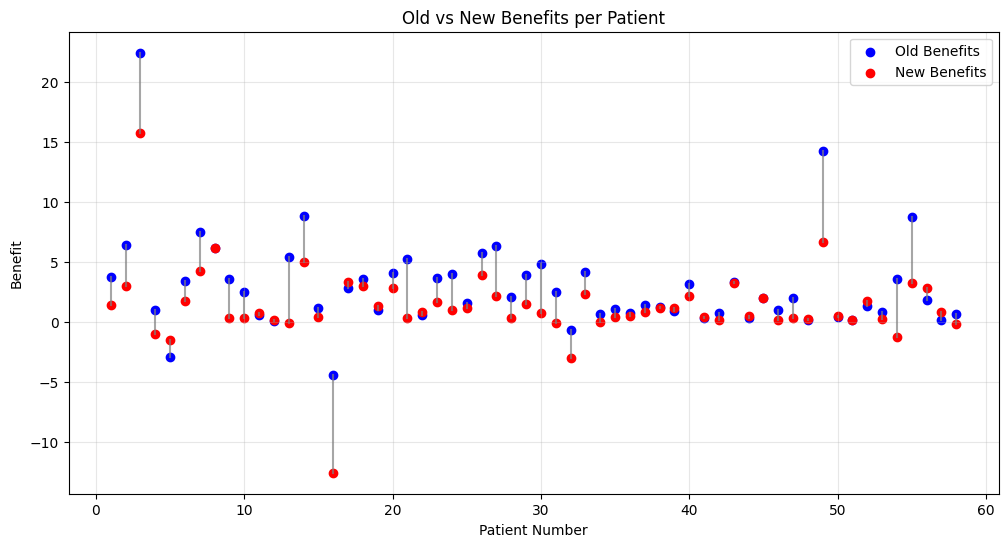

In [22]:
plt.figure(figsize=(12, 6))
x = numbers.values

plt.scatter(x, old_benefits, color='blue', label='Old Benefits')
plt.scatter(x, new_benefits, color='red', label='New Benefits')

for i in range(len(x)):
    plt.plot([x[i], x[i]], [old_benefits[i], new_benefits[i]], color='gray', linestyle='-', alpha=0.7)

plt.xlabel('Patient Number')
plt.ylabel('Benefit')
plt.title('Old vs New Benefits per Patient')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Text(0.5, 1.0, 'new benefits 0 intercept 0.5 slope in ccGy')

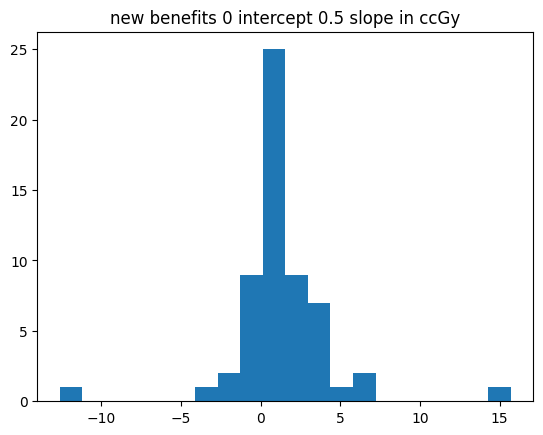

In [23]:
plt.hist(new_benefits, bins = 20)
plt.title('new benefits 0 intercept 0.5 slope in ccGy')

Text(0.5, 1.0, 'old benefits 0 intercept in ccGy')

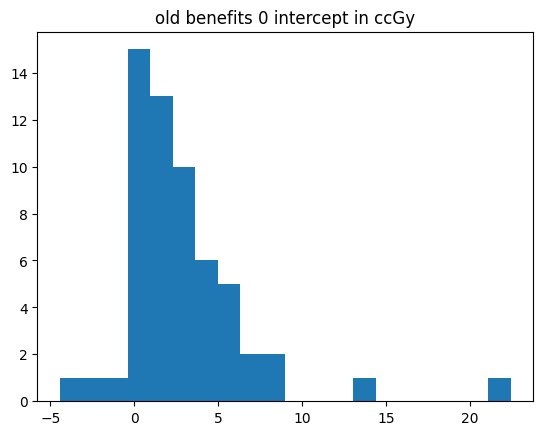

In [24]:
plt.hist(old_benefits, bins = 20)
plt.title('old benefits 0 intercept in ccGy')

In [25]:
new_benefits

array([  1.4,   3. ,  15.7,  -1. ,  -1.5,   1.7,   4.2,   6.1,   0.3,
         0.3,   0.7,   0.1,  -0.1,   5. ,   0.4, -12.6,   3.3,   3. ,
         1.3,   2.8,   0.3,   0.8,   1.6,   1. ,   1.1,   3.9,   2.1,
         0.3,   1.5,   0.7,  -0.1,  -3. ,   2.3,   0. ,   0.4,   0.5,
         0.8,   1.1,   1.1,   2.1,   0.4,   0.1,   3.2,   0.5,   2. ,
         0.1,   0.3,   0.2,   6.6,   0.5,   0.1,   1.7,   0.2,  -1.3,
         3.2,   2.8,   0.8,  -0.2])

In [26]:
index = 15

In [27]:
doses, accum, total_penalty = af.adaptfx_full(volumes = np.array(patients_df['Overlaps'][index]), number_of_fractions= 5, min_dose = 6, max_dose = 10, mean_dose = patients_df['Prescription'][index]/5, dose_steps = 0.5)
standard_penalties = penalty_calc_full(np.array(patients_df['Overlaps'][index][1:]), patients_df['Prescription'][index]/5, 6)


0 7.0
penalty 4.8229999999999995
1 7.0
penalty 8.917250000000001
2 9.0
penalty 20.2635
3 8.0
penalty 19.767000000000003
4 9.0
penalty 54.33225


In [28]:
patients_df

,Patient number,Overlaps,Prescription,AF doses,benefits,penalties
0,1,"[2.02, 2.41, 3.04, 1.96, 5.3, 3.27]",33,[6. 6. 9. 6. 6.],3.708,-5.88
1,2,"[6.19, 10.97, 4.91, 7.65, 5.73, 5.87]",33,[6. 9. 6. 6. 6.],6.348,-14.73
2,3,"[9.08, 19.79, 6.02, 9.45, 19.59, 12.62]",33,[6. 9. 6. 6. 6.],22.422,-18.06
3,4,"[15.07, 19.81, 16.12, 22.630000000000003, 18.0...",33,[6. 6. 6. 9. 6.],0.984,-54.27
4,5,"[17.150000000000002, 18.68, 18.35, 28.56000000...",33,[6. 6. 6. 6. 9.],-2.976,-68.94
5,6,"[0.25, 0.53, 0.99, 2.66, 2.41, 0.27]",35,[ 6. 6. 6. 7. 10.],3.370,-3.49
6,7,"[5.41, 8.2, 9.16, 8.18, 5.45, 7.28]",40,[ 6. 6. 10. 10. 8.],7.460,-69.08
7,8,"[0.41, 2.37, 0.68, 2.67, 1.62, 1.27]",40,[ 6. 10. 6. 8. 10.],6.180,-11.04
8,9,"[9.52, 12.18, 8.52, 9.39, 9.639999999999999, 8...",33,[6. 9. 6. 6. 6.],3.570,-25.56
9,10,"[4.58, 5.78, 6.3, 3.83, 4.67, 2.69]",33,[6. 6. 9. 6. 6.],2.472,-11.49


In [29]:
np.array(patients_df['Overlaps'][index])

array([1.38, 3.64, 6.73, 3.42, 5.99, 9.17])

In [30]:
total_penalty

-108.10300000000001

In [31]:
standard_penalties.sum() - total_penalty

12.568000000000012

In [32]:
new_benefits

array([  1.4,   3. ,  15.7,  -1. ,  -1.5,   1.7,   4.2,   6.1,   0.3,
         0.3,   0.7,   0.1,  -0.1,   5. ,   0.4, -12.6,   3.3,   3. ,
         1.3,   2.8,   0.3,   0.8,   1.6,   1. ,   1.1,   3.9,   2.1,
         0.3,   1.5,   0.7,  -0.1,  -3. ,   2.3,   0. ,   0.4,   0.5,
         0.8,   1.1,   1.1,   2.1,   0.4,   0.1,   3.2,   0.5,   2. ,
         0.1,   0.3,   0.2,   6.6,   0.5,   0.1,   1.7,   0.2,  -1.3,
         3.2,   2.8,   0.8,  -0.2])

In [33]:
df_new = pd.DataFrame({
    'Patient number': patients_df['Patient number'],
    'Overlaps': patients_df['Overlaps'],
    'Prescription': patients_df['Prescription'],
    'AF doses':doses_all_full,
    'AF doses old': patients_df['AF doses'],
    'Benefits': benefits_full
})

In [34]:
df_new

,Patient number,Overlaps,Prescription,AF doses,AF doses old,Benefits
0,1,"[2.02, 2.41, 3.04, 1.96, 5.3, 3.27]",33,"[6.5, 6.5, 7.0, 6.0, 7.0]",[6. 6. 9. 6. 6.],1.360097
1,2,"[6.19, 10.97, 4.91, 7.65, 5.73, 5.87]",33,"[6.0, 7.5, 6.5, 6.5, 6.5]",[6. 9. 6. 6. 6.],3.043710
2,3,"[9.08, 19.79, 6.02, 9.45, 19.59, 12.62]",33,"[6.0, 8.0, 6.5, 6.0, 6.5]",[6. 9. 6. 6. 6.],15.681802
3,4,"[15.07, 19.81, 16.12, 22.630000000000003, 18.0...",33,"[6.5, 6.5, 6.5, 7.0, 6.5]",[6. 6. 6. 9. 6.],-0.953220
4,5,"[17.150000000000002, 18.68, 18.35, 28.56000000...",33,"[6.5, 6.5, 6.0, 7.0, 7.0]",[6. 6. 6. 6. 9.],-1.460458
5,6,"[0.25, 0.53, 0.99, 2.66, 2.41, 0.27]",35,"[6.0, 6.0, 6.0, 7.5, 9.5]",[ 6. 6. 6. 7. 10.],1.692250
6,7,"[5.41, 8.2, 9.16, 8.18, 5.45, 7.28]",40,"[7.5, 7.5, 8.0, 9.0, 8.0]",[ 6. 6. 10. 10. 8.],4.247250
7,8,"[0.41, 2.37, 0.68, 2.67, 1.62, 1.27]",40,"[6.5, 10.0, 6.5, 8.5, 8.5]",[ 6. 10. 6. 8. 10.],6.132188
8,9,"[9.52, 12.18, 8.52, 9.39, 9.639999999999999, 8...",33,"[6.5, 7.0, 6.5, 6.5, 6.5]",[6. 9. 6. 6. 6.],0.253912
9,10,"[4.58, 5.78, 6.3, 3.83, 4.67, 2.69]",33,"[6.5, 6.5, 7.0, 6.5, 6.5]",[6. 6. 9. 6. 6.],0.310340


In [35]:
df_new.to_csv('adaptfx_benefits_0_intercept_0.5_slope.csv', index=False)

## Let's compare some more

In [36]:
np.array(df_new['AF doses old'])
old_doses_array = np.zeros((len(df_new), 5))
for index in range(len(df_new)):
    old_doses_array[index,:] = np.fromstring(df_new['AF doses old'][index].strip('[]'), sep=' ')

In [37]:
# Convert both arrays to numpy arrays with proper shape
new_doses_array = np.array([np.array(doses) for doses in df_new['AF doses']])
print(f"New doses shape: {new_doses_array.shape}")
print(f"Old doses shape: {old_doses_array.shape}")

# Calculate the difference
dose_differences = new_doses_array - old_doses_array
print(f"Difference shape: {dose_differences.shape}")
print(f"First few differences:\n{dose_differences[:5]}")


New doses shape: (58, 5)
Old doses shape: (58, 5)
Difference shape: (58, 5)
First few differences:
[[ 0.5  0.5 -2.   0.   1. ]
 [ 0.  -1.5  0.5  0.5  0.5]
 [ 0.  -1.   0.5  0.   0.5]
 [ 0.5  0.5  0.5 -2.   0.5]
 [ 0.5  0.5  0.   1.  -2. ]]


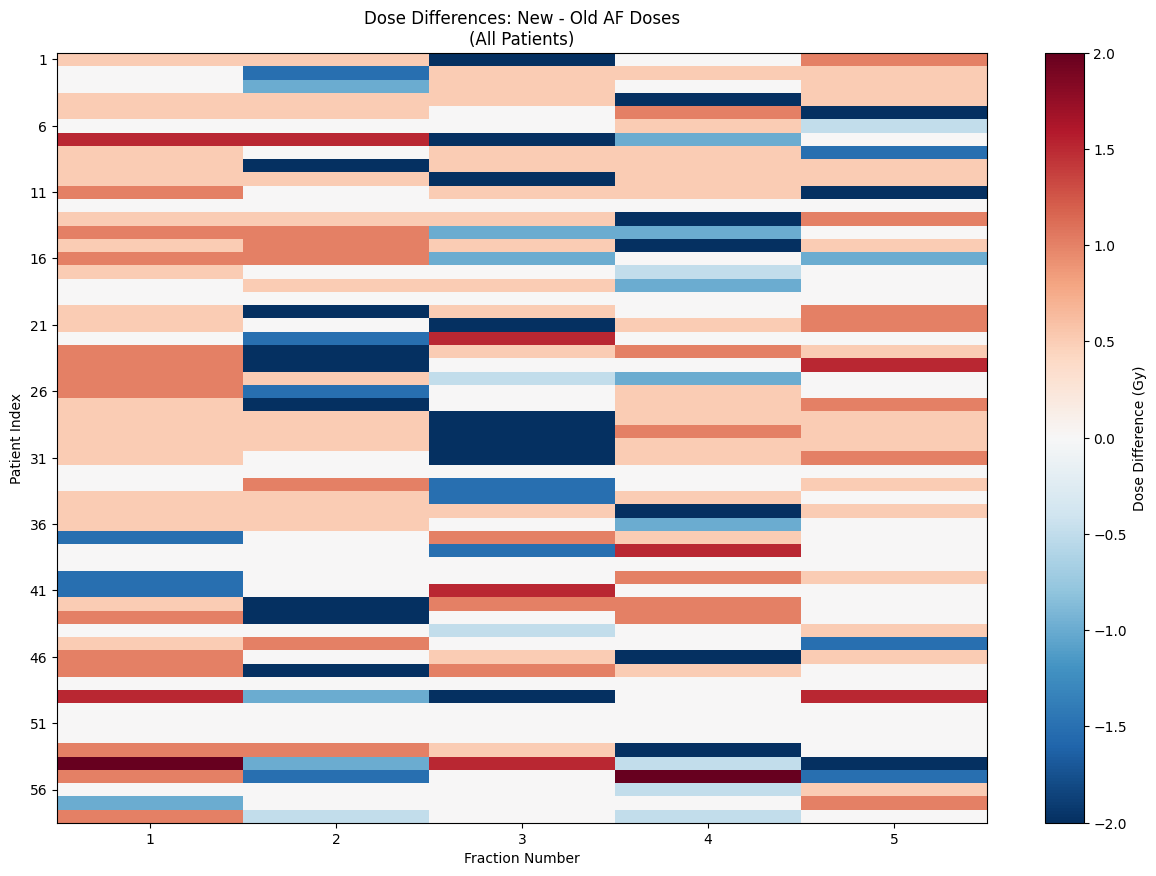

Patients with no changes: 8
Patients with any changes: 50


In [38]:
# Create a nice visualization of dose differences
plt.figure(figsize=(15, 10))

# Get patient numbers for labeling
patient_numbers = df_new['Patient number'].values

# Create a heatmap-style plot
plt.subplot(1,1,1)
im = plt.imshow(dose_differences, cmap='RdBu_r', aspect='auto', vmin=-2, vmax=2)
plt.colorbar(im, label='Dose Difference (Gy)')
plt.title('Dose Differences: New - Old AF Doses\n(All Patients)', fontsize=12)
plt.xlabel('Fraction Number')
plt.ylabel('Patient Index')
plt.xticks(range(5), range(1, 6))
plt.yticks(range(0, len(patient_numbers), 5), patient_numbers[::5])
plt.show()

print(f"Patients with no changes: {np.sum(np.all(dose_differences == 0, axis=1))}")
print(f"Patients with any changes: {np.sum(np.any(dose_differences != 0, axis=1))}")

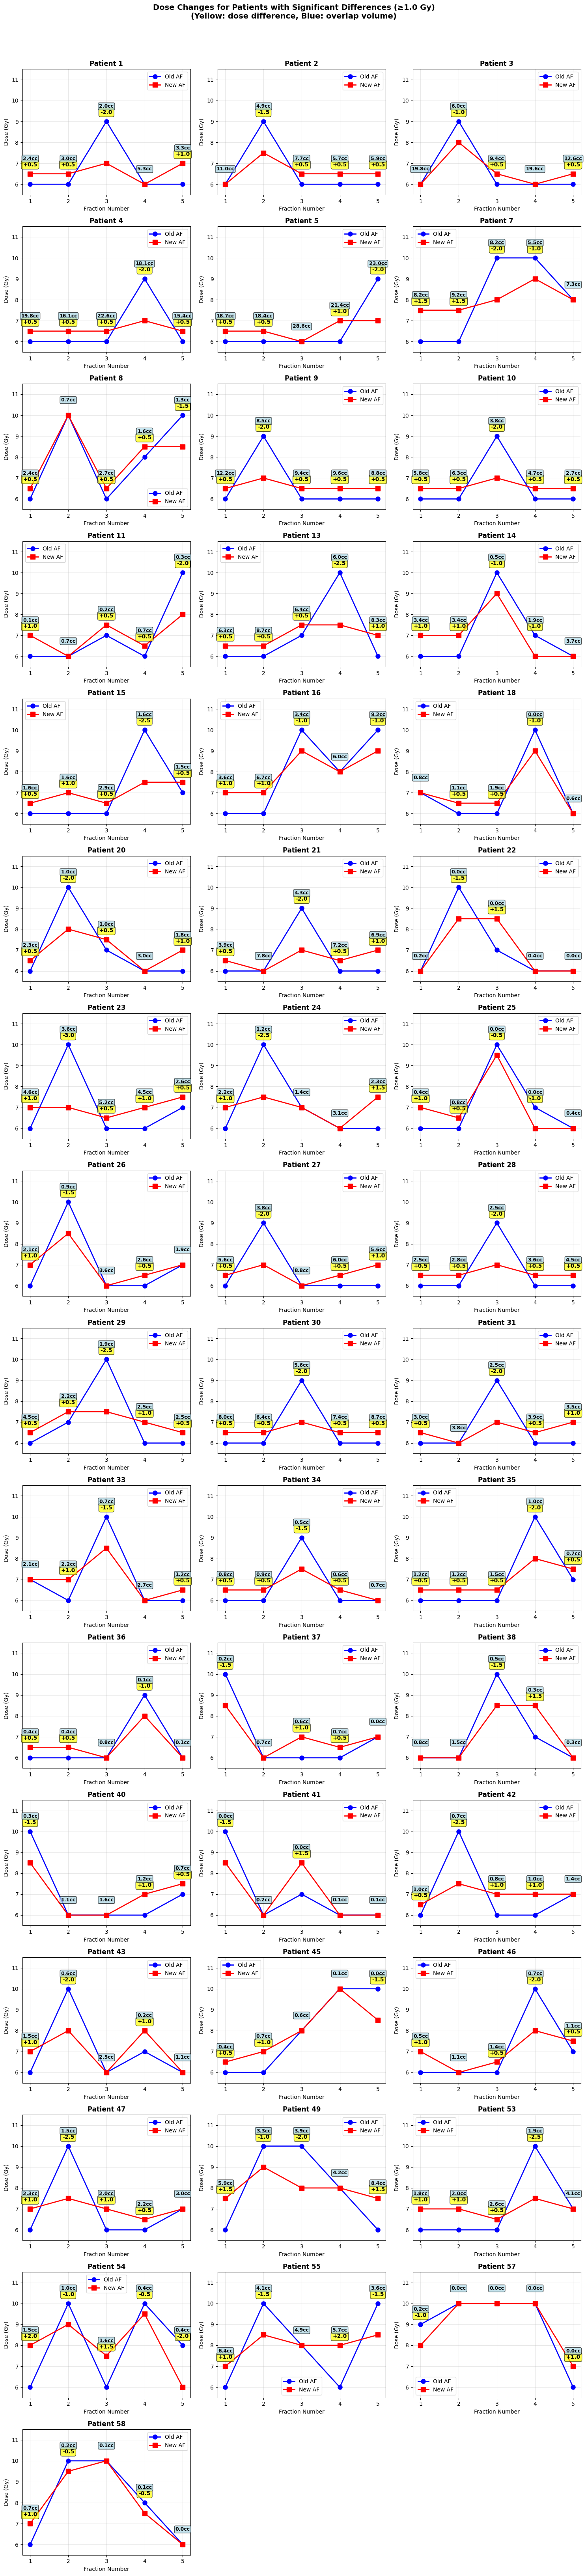


Showing 46 patients with dose changes ≥ 1.0 Gy:
  Patient 1
  Patient 2
  Patient 3
  Patient 4
  Patient 5
  Patient 7
  Patient 8
  Patient 9
  Patient 10
  Patient 11
  Patient 13
  Patient 14
  Patient 15
  Patient 16
  Patient 18
  Patient 20
  Patient 21
  Patient 22
  Patient 23
  Patient 24
  Patient 25
  Patient 26
  Patient 27
  Patient 28
  Patient 29
  Patient 30
  Patient 31
  Patient 33
  Patient 34
  Patient 35
  Patient 36
  Patient 37
  Patient 38
  Patient 40
  Patient 41
  Patient 42
  Patient 43
  Patient 45
  Patient 46
  Patient 47
  Patient 49
  Patient 53
  Patient 54
  Patient 55
  Patient 57
  Patient 58


In [39]:
# Detailed view: Show dose differences for patients with significant changes
significant_change_threshold = 1.0  # Gy
patients_with_changes = []

for i, patient_num in enumerate(patient_numbers):
    if np.any(np.abs(dose_differences[i]) >= significant_change_threshold):
        patients_with_changes.append((i, patient_num))

if patients_with_changes:
    # Calculate number of subplots needed
    n_patients = len(patients_with_changes)
    n_cols = min(3, n_patients)
    n_rows = (n_patients + n_cols - 1) // n_cols
    
    plt.figure(figsize=(5*n_cols, 4*n_rows))
    
    for plot_idx, (patient_idx, patient_num) in enumerate(patients_with_changes):
        plt.subplot(n_rows, n_cols, plot_idx + 1)
        
        fractions = range(1, 6)
        old_doses = old_doses_array[patient_idx]
        new_doses = new_doses_array[patient_idx]
        differences = dose_differences[patient_idx]
        
        # Get overlap values for this patient (skip planning scan - index 0)
        patient_overlaps = df_new['Overlaps'].iloc[patient_idx][1:]  # Skip first element (planning scan)
        
        # Plot old vs new doses
        plt.plot(fractions, old_doses, 'o-', label='Old AF', linewidth=2, markersize=8, color='blue')
        plt.plot(fractions, new_doses, 's-', label='New AF', linewidth=2, markersize=8, color='red')
        
        # Add difference annotations and overlap values
        for frac, diff, overlap in zip(fractions, differences, patient_overlaps):
            y_max = max(old_doses[frac-1], new_doses[frac-1])
            
            # Add dose difference annotation
            if abs(diff) >= 0.5:  # Only annotate substantial differences
                plt.annotate(f'{diff:+.1f}', 
                           xy=(frac, y_max + 0.3),
                           ha='center', va='bottom', fontsize=10, fontweight='bold',
                           bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))
            
            # Add overlap annotation
            plt.annotate(f'{overlap:.1f}cc', 
                       xy=(frac, y_max + 0.6),
                       ha='center', va='bottom', fontsize=9, fontweight='bold',
                       bbox=dict(boxstyle='round,pad=0.2', facecolor='lightblue', alpha=0.7))
        
        plt.title(f'Patient {patient_num}', fontsize=12, fontweight='bold')
        plt.xlabel('Fraction Number')
        plt.ylabel('Dose (Gy)')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.xticks(fractions)
        plt.ylim(5.5, 11.5)  # Increased upper limit to accommodate annotations
    
    plt.tight_layout()
    plt.suptitle(f'Dose Changes for Patients with Significant Differences (≥{significant_change_threshold} Gy)\n(Yellow: dose difference, Blue: overlap volume)', 
                 fontsize=14, fontweight='bold', y=1.02)
    plt.show()
    
    print(f"\nShowing {len(patients_with_changes)} patients with dose changes ≥ {significant_change_threshold} Gy:")
    for _, patient_num in patients_with_changes:
        print(f"  Patient {patient_num}")
else:
    print(f"No patients found with dose changes ≥ {significant_change_threshold} Gy")